# 14장 모델의 성능 향상시키기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch14-colab.ipynb)

## 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [3]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


C:\Ananconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 1s 34ms/step - loss: 0.3880 - accuracy: 0.8319 - val_loss: 0.3394 - val_accuracy: 0.8554
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3340 - accuracy: 0.8483 - val_loss: 0.3208 - val_accuracy: 0.8600
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 0.8809 - val_loss: 0.3013 - val_accuracy: 0.8846
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.8820 - val_loss: 0.2857 - val_accuracy: 0.8954
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.9043 - val_loss: 0.2715 - val_accuracy: 0.9046
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2633 - accuracy: 0.9081 - val_loss: 0.2566 - val_accuracy: 0.9108
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.9187 - val_loss: 0.2430 - val_accuracy: 0.9138
Epoch 8/50
8/8 [============================

In [4]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 967us/step - loss: 0.1194 - accuracy: 0.9585
Test accuracy: 0.9584615230560303


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [6]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

C:\Ananconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]



Epoch 1: saving model to ./data/model/all\01-0.7462.hdf5

Epoch 2: saving model to ./data/model/all\02-0.7254.hdf5

Epoch 3: saving model to ./data/model/all\03-0.7585.hdf5

Epoch 4: saving model to ./data/model/all\04-0.7769.hdf5

Epoch 5: saving model to ./data/model/all\05-0.8015.hdf5

Epoch 6: saving model to ./data/model/all\06-0.8323.hdf5

Epoch 7: saving model to ./data/model/all\07-0.8446.hdf5

Epoch 8: saving model to ./data/model/all\08-0.8592.hdf5

Epoch 9: saving model to ./data/model/all\09-0.8885.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9023.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9123.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9138.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9185.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9215.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9231.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9246.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9254.hdf5

Epoch

In [7]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.9438
Test accuracy: 0.9438461661338806


## 3. 그래프로 과적합 확인하기

In [8]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

C:\Ananconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [9]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.152517,0.944316,0.171470,0.944615
1,0.152190,0.943546,0.167654,0.944615
2,0.150806,0.943546,0.168272,0.944615
3,0.149453,0.944060,0.165566,0.943846
4,0.149114,0.943033,0.166593,0.944615
...,...,...,...,...
1995,0.025600,0.993072,0.085554,0.990000
1996,0.027384,0.991789,0.086801,0.990000
1997,0.025468,0.992302,0.088677,0.989231
1998,0.024388,0.993328,0.086945,0.989231


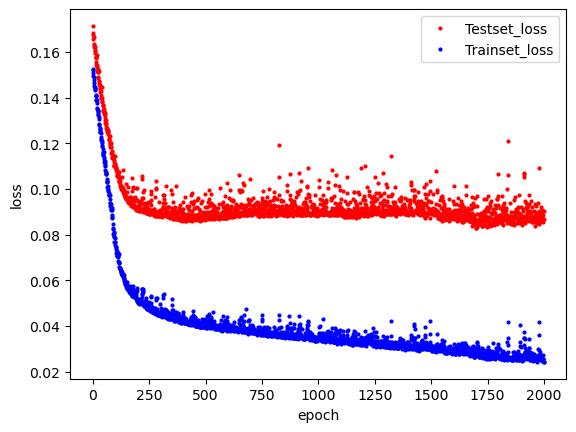

In [10]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [12]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000


C:\Ananconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 1s 24ms/step - loss: 18.4429 - accuracy: 0.2425 - val_loss: 11.3774 - val_accuracy: 0.2323
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 7.3897 - accuracy: 0.2425 - val_loss: 4.4958 - val_accuracy: 0.2323
Epoch 3/2000
8/8 [==============================] - 0s 8ms/step - loss: 3.1515 - accuracy: 0.2425 - val_loss: 1.4369 - val_accuracy: 0.2538
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.8227 - accuracy: 0.5414 - val_loss: 0.4034 - val_accuracy: 0.7823
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.3822 - accuracy: 0.7614 - val_loss: 0.3687 - val_accuracy: 0.7685
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.3917 - accuracy: 0.7585 - val_loss: 0.3844 - val_accuracy: 0.7700
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3999 - accuracy: 0.7624 - val_loss: 0.3762 - val_accuracy: 0.7854
Epoch 8/2000
8/8 [============

8/8 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9489 - val_loss: 0.1525 - val_accuracy: 0.9462
Epoch 60/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1524 - accuracy: 0.9482 - val_loss: 0.1490 - val_accuracy: 0.9523
Epoch 61/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1525 - accuracy: 0.9494 - val_loss: 0.1462 - val_accuracy: 0.9446
Epoch 62/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1487 - accuracy: 0.9492 - val_loss: 0.1454 - val_accuracy: 0.9515
Epoch 63/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1493 - accuracy: 0.9505 - val_loss: 0.1438 - val_accuracy: 0.9469
Epoch 64/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1480 - accuracy: 0.9492 - val_loss: 0.1389 - val_accuracy: 0.9492
Epoch 65/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1450 - accuracy: 0.9505 - val_loss: 0.1374 - val_accuracy: 0.9500
Epoch 66/2000
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.0957 - accuracy: 0.9720 - val_loss: 0.0879 - val_accuracy: 0.9662
Epoch 118/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0948 - accuracy: 0.9700 - val_loss: 0.0921 - val_accuracy: 0.9731
Epoch 119/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0963 - accuracy: 0.9695 - val_loss: 0.0844 - val_accuracy: 0.9692
Epoch 120/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0976 - accuracy: 0.9695 - val_loss: 0.1015 - val_accuracy: 0.9615
Epoch 121/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1018 - accuracy: 0.9666 - val_loss: 0.0870 - val_accuracy: 0.9746
Epoch 122/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0922 - accuracy: 0.9710 - val_loss: 0.0834 - val_accuracy: 0.9715
Epoch 123/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0907 - accuracy: 0.9715 - val_loss: 0.0828 - val_accuracy: 0.9723
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0711 - accuracy: 0.9815 - val_loss: 0.0647 - val_accuracy: 0.9800
Epoch 176/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0728 - accuracy: 0.9782 - val_loss: 0.0684 - val_accuracy: 0.9746
Epoch 177/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0720 - accuracy: 0.9795 - val_loss: 0.0702 - val_accuracy: 0.9738
Epoch 178/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0709 - accuracy: 0.9790 - val_loss: 0.0658 - val_accuracy: 0.9808
Epoch 179/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0678 - accuracy: 0.9797 - val_loss: 0.0639 - val_accuracy: 0.9808
Epoch 180/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.0672 - val_accuracy: 0.9800
Epoch 181/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0640 - val_accuracy: 0.9815
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0574 - accuracy: 0.9843 - val_loss: 0.0582 - val_accuracy: 0.9838
Epoch 234/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0592 - accuracy: 0.9836 - val_loss: 0.0553 - val_accuracy: 0.9838
Epoch 235/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0582 - accuracy: 0.9851 - val_loss: 0.0559 - val_accuracy: 0.9831
Epoch 236/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0596 - accuracy: 0.9828 - val_loss: 0.0634 - val_accuracy: 0.9823
Epoch 237/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0622 - accuracy: 0.9800 - val_loss: 0.0616 - val_accuracy: 0.9831
Epoch 238/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0583 - accuracy: 0.9833 - val_loss: 0.0564 - val_accuracy: 0.9823
Epoch 239/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0576 - accuracy: 0.9841 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 

Epoch 291/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9854 - val_loss: 0.0539 - val_accuracy: 0.9815
Epoch 292/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0552 - accuracy: 0.9838 - val_loss: 0.0503 - val_accuracy: 0.9846
Epoch 293/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.9856 - val_loss: 0.0559 - val_accuracy: 0.9777
Epoch 294/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0537 - accuracy: 0.9846 - val_loss: 0.0504 - val_accuracy: 0.9846
Epoch 295/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9846 - val_loss: 0.0512 - val_accuracy: 0.9838
Epoch 296/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0522 - accuracy: 0.9849 - val_loss: 0.0502 - val_accuracy: 0.9846
Epoch 297/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0528 - accuracy: 0.9851 - val_loss: 0.0515 - val_accuracy: 0.9846
Epoch 

Epoch 349/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0496 - val_accuracy: 0.9854
Epoch 350/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 0.9861 - val_loss: 0.0481 - val_accuracy: 0.9854
Epoch 351/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0476 - accuracy: 0.9872 - val_loss: 0.0561 - val_accuracy: 0.9823
Epoch 352/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9851 - val_loss: 0.0520 - val_accuracy: 0.9823
Epoch 353/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0495 - val_accuracy: 0.9831
Epoch 354/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0484 - accuracy: 0.9859 - val_loss: 0.0482 - val_accuracy: 0.9846
Epoch 355/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0476 - val_accuracy: 0.9846
Epoch 

Epoch 407/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0455 - val_accuracy: 0.9846
Epoch 408/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0450 - accuracy: 0.9872 - val_loss: 0.0444 - val_accuracy: 0.9854
Epoch 409/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0552 - val_accuracy: 0.9815
Epoch 410/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0469 - accuracy: 0.9843 - val_loss: 0.0464 - val_accuracy: 0.9854
Epoch 411/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.0575 - val_accuracy: 0.9777
Epoch 412/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.0523 - val_accuracy: 0.9838
Epoch 413/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.0450 - val_accuracy: 0.9869
Epoch 

Epoch 465/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0497 - val_accuracy: 0.9846
Epoch 466/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 467/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 468/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0426 - accuracy: 0.9877 - val_loss: 0.0410 - val_accuracy: 0.9892
Epoch 469/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0433 - accuracy: 0.9887 - val_loss: 0.0472 - val_accuracy: 0.9877
Epoch 470/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0457 - val_accuracy: 0.9877
Epoch 471/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9879 - val_loss: 0.0459 - val_accuracy: 0.9869
Epoch 

In [13]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 808us/step - loss: 0.0668 - accuracy: 0.9823
Test accuracy: 0.9823076725006104
